# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch

In [2]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

#get_ipython().system('python -m pip install pyvirtualdisplay')
#from pyvirtualdisplay import Display
#display = Display(visible=0, size=(1400, 900))
#display.start()

is_ipython = 'inline' in plt.get_backend()
if is_ipython:
    from IPython import display

plt.ion()


In [3]:
from collections import deque

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [4]:
#env = UnityEnvironment(file_name="...")
# NOTE: seem to need to specify worker_id from time to time...
#NOTE 2/18/2022: we sometimes get errors and have to switch the worker_id; values of 1 and 2 seeme to cover most problems
env = UnityEnvironment(
    file_name="./Banana.exe",worker_id=1)
#env = UnityEnvironment(file_name="./Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [5]:
print(env,dir(env))

Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , ,  ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_academy_name', '_brain_names', '_brains', '_buffer_size', '_close', '_curriculum', '_external_brain_names', '_flatten', '_generate_res

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [6]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [7]:
print(brain)
print(dir(brain))


Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'brain_name', 'camera_resolutions', 'num_stacked_vector_observations', 'number_visual_observations', 'vector_action_descriptions', 'vector_action_space_size', 'vector_action_space_type', 'vector_observation_space_size', 'vector_observation_space_type']


### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [8]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


In [9]:
print(env_info,dir(env_info))


<unityagents.brain.BrainInfo object at 0x000001F47FE657F0> ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'agents', 'local_done', 'max_reached', 'memories', 'previous_text_actions', 'previous_vector_actions', 'rewards', 'text_observations', 'vector_observations', 'visual_observations']


In [10]:
print(env.brains)

{'BananaBrain': <unityagents.brain.BrainParameters object at 0x000001F47FE65BE0>}


In [11]:
print(env_info.memories)
print(env_info.previous_text_actions)
print(env_info.previous_vector_actions)
print(env_info.text_observations)
print(env_info.visual_observations)


[]
['']
[[0.]]
['']
[]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [12]:
#NOTE 2/18/2022 KAE: this was in the project previously but we modified it slightly to go through n_episodes (currently 10) 
# given the above statement we commented this out instead of leaving in as a reference.
#n_episodes = 10
#for i_episode in range(1, n_episodes+1):
#    print('i: ',i_episode)
#    env_info = env.reset(train_mode=True)[brain_name] # reset the environment
#    state = env_info.vector_observations[0]            # get the current state
#    score = 0                                          # initialize the score
#    while True:
#        action = np.random.randint(action_size)        # select an action
#        env_info = env.step(action)[brain_name]        # send the action to the environment
#        next_state = env_info.vector_observations[0]   # get the next state
#        reward = env_info.rewards[0]                   # get the reward
#        done = env_info.local_done[0]                  # see if episode has finished
#        score += reward                                # update the score
#        state = next_state                             # roll over the state to next time step
#        if done:                                       # exit loop if episode finished
#            print('i, final score: ',i_episode, score)
#           break
            


When finished, you can close the environment.

In [13]:
#NOTE this seems to end the session COMPLETELY so moving it to bottom of page....
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

# PRELIMINARY NOTES:
Ran the random actions provided section of code (now commented out) above (for 10 episodes) and get a score of 0.0. We assume this is normal as the video fails to provide this key element but it "makes sense"

Our expectation based in the instructions is to start with our DQN model we used prior and to adjust to fit into this different (Unity) paradym for starters and to meet the performance requirement as needed. We didn't find this necessary however.

We started with just importing the model and agent from DQN as before. Locally we've renamed the python files dqn_model.py and dqn_agent.py. We found this model to work adequately and so didn't try anything else, but will see about implementing some of the other techniques as well. 

## APPROACH
We started with the default (intial) values for the DQN internal or hyperparameters, expecting to make further refinements and network adjustments as needed to meet the requirements, but none were needed because the defaults trained quickly (< 500 episodes). 

The two included python files are dqn_model.py, which contains the QNetwork implementation (only seen by the agent) from DQN, and dqn_agent.py, which contains the Agent class as well as a supporting ReplayBuffer class to store the experiences in tuples for use by the Qnetworks.

QNetwork is composed of 3 fully connected layers with two NN internal sizes (defaults: fc1_size=64 and fc2_size=64) using RELU activation functions along with an initial state_size and a final action_size to map into the bananas input (state) and output (action) environment. The Qnetwork has an __init__ function to be invoked on class creation and the forward method using the NN's to convert the current state into an action.

Agent: the initial agent solution used in the DQN mini project was used as-is with the following Hyperparamters:
Buffer size: 100,000
batch size: 64
gamma: 0.99 # discount factor for subsequent rewards
tau: 1e-3, # soft update of the target parameters
LR: 5e-4, # learning rate
UPDATE_EVERY: 4, how often to update the network

The Agent class itself is composed of an __init__ fuction for construction, which creates the two qnetworks, one that is local and one that is the target network, along with the optimizer and memory buffer from the ReplayBuffer class to store experiences. 

The Agent step method adds the current experience into the memory buffer, and every UPDATE_EVERY steps stores the experience into memory and exectutes the learn fucntion.

The Agent act method returns actions for a given state given current policy. It does this by evaluating (eval) the local qnetwork, get new actions from the local qnetwork, train the local network, and finally select actions either randomly (if a random toss is bigger than the hyperparameter eps, which for our setup has a start (max), end(min) and a decay (multiplier to determine new eps value) to allow it to start pretty randomly but (slowly) select more from the train policy actions.

The Agent learn method was the one for which we had to provide the appropriate solutions previously with the DQN mini-project. Here we unpack the tuple experiences into states, actions, rewards, next_states, and dones. The next_states are used in the target (NOT local) qnetwork to get the next target actions. These are then detached from the resulting tensor to make a true copy, access Qtable for the next action, and hence the rewards of the target network. The resulting tensor has to be (carefully) unpacked to get it into the correct form to be used in subsequent calculations. We then get the next action results from the local qnetwork and then determine the MSE loss between the target and local network fits. We then zero_grad the optimizer, propagate the loss backwards through the network, and perform a step in the optimizer. Finally a soft update is performed on the target network, using TAU times the local network parameters and (1-TAU) times the target network parameters to update the target network parameters.

As indicated the original DQN agent has a helper class ReplayBuffer, with methods add, to add experiences to the buffer, and sample, to sample experiences from the buffer, and is used extensively in the step method for the Agent class.

Originally we expected to look at some of the post-dqn example approaches, especially the dueling networks and the prioritized experience replay. However since these were mainly modifications of the internal workings of the agents and the like. we felt that it was best to first get the baseline DQN running and then see if there are problems about possibly making these modifications. 

So we start with our original agent and model, which we've imported locally and import the (slightly modified) dqn functionfor the unity setup. 

This is then inported in the next line

In [14]:
from dqn_agent import Agent

In [15]:
len_agents = len(env_info.agents)
# number of agents in the environment
print('Number of agents:', len_agents)
#from dqn_agent import Agent
agent = Agent(state_size=state_size, action_size=action_size, seed=0)

Number of agents: 1


## Connecting with Unity instead of Gym
There are a few differences between AIGym and Unity; namely how the env is defined and used.

We use the dqn function we had before with a few minor tweaks to meet our needs, including a train_mode logical, and the max score threshold


In [16]:
#ORIGINAL DQN function interface: def dqn(agent, env, env_info, n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, 
#        eps_decay=0.995, dprint=100):
def dqn(agent, env, brain_name, train_mode=True, n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, 
        eps_decay=0.995, dprint=100, MAX_SCORE=13.0):
    """Deep Q-Learning.
    
    Params
    ======
        agent: agent class with embedded model
        env: environment class, now from unity
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    ave_scores = []                    # list containing ave scores from dprint average
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    prev_score = 0
    print('before episodes:',str(env))
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=train_mode)[brain_name]
        state = env_info.vector_observations[0]            # get the current state
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            
            # NOTE: steal the way of getting next_state, reward, done from environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            # NOTE KAE: we kept this in as this was part of our attempts to test (train_mode=False) but 
            #  didn't seem to work as well unless train_mode was true (run the agent.step)
#            if train_mode:
#                agent.step(state, action, reward, next_state, done)
            agent.step(state, action, reward, next_state, done)
    
            state = next_state
            score += reward
            if score > prev_score:
                prev_score = score
            
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        if i_episode % dprint == 0:
            ave_score = np.mean(scores_window)
            ave_scores.append(ave_score)
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, ave_score))
        if (np.mean(scores_window)>= MAX_SCORE):
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            if  train_mode:
                torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores, ave_scores

In [17]:
dprint = 10
scores, ave_scores = dqn(agent, env, brain_name, train_mode=True, n_episodes=2000, max_t=1000, eps_start=1.0, 
             eps_end=0.01, eps_decay=0.995, dprint=dprint)

before episodes: Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 
Episode 10	Average Score: -0.30
Episode 20	Average Score: -0.15
Episode 30	Average Score: -0.03
Episode 40	Average Score: 0.03
Episode 50	Average Score: 0.00
Episode 60	Average Score: 0.07
Episode 70	Average Score: 0.20
Episode 80	Average Score: 0.33
Episode 90	Average Score: 0.44
Episode 100	Average Score: 0.67
Episode 110	Average Score: 1.04
Episode 120	Average Score: 1.32
Episode 130	Average Score: 1.75
Episode 140	Average Score: 2.09
Episode 150	Average Sc

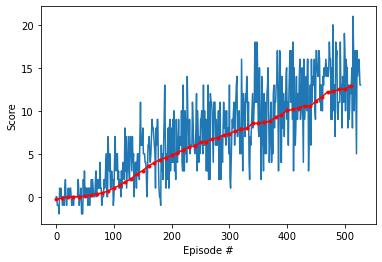

In [18]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.plot(np.arange(len(ave_scores))*dprint, ave_scores,'r.-')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()



In [19]:
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))
agent.qnetwork_local.eval()
#env_info = env.reset(train_mode=False)[brain_name] # reset the environment
env_info = env.reset(train_mode=False)[brain_name] # reset the environment

#scores = dqn(agent, env, brain_name, train_mode=False, n_episodes=2000, max_t=1000, eps_start=1.0, 
#             eps_end=0.01, eps_decay=0.995, dprint=100)
tscores, tave_scores = dqn(agent, env, brain_name, train_mode=True, n_episodes=2000, max_t=1000, eps_start=1.0, 
             eps_end=0.01, eps_decay=0.995, dprint=dprint)


before episodes: Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 
Episode 10	Average Score: 0.10
Episode 20	Average Score: -0.10
Episode 30	Average Score: -0.13
Episode 40	Average Score: 0.28
Episode 50	Average Score: 0.50
Episode 60	Average Score: 0.75
Episode 70	Average Score: 0.99
Episode 80	Average Score: 1.26
Episode 90	Average Score: 1.58
Episode 100	Average Score: 1.87
Episode 110	Average Score: 2.39
Episode 120	Average Score: 2.96
Episode 130	Average Score: 3.42
Episode 140	Average Score: 3.76
Episode 150	Average Sco

In [20]:
#print(scores)
tscores = scores
np.arange(len(tscores))
len(scores)

528

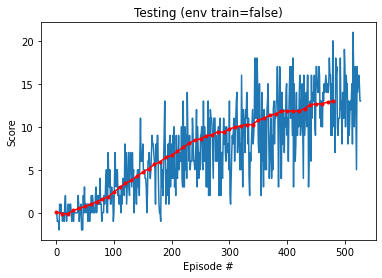

In [23]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(tscores)), tscores)
plt.plot(np.arange(len(tave_scores))*dprint, tave_scores,'r.-')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Testing (env train=false)')
plt.show()


In [22]:
env.close()